In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
df=pd.read_csv("fifa_eda_stats.csv")
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [268]:
#Reset index and remove unnecessary columncs
df.set_index('ID', inplace=True)
df.drop(columns=['Jersey Number', 'Release Clause', 'Loaned From', 'Contract Valid Until' , "Overall", "Potential", "Value", "Joined"], inplace=True)

In [269]:
#Convert currency columns
def ConvertNumeric(value):
    # Remove Euro sign and whitespace
    value = value.replace('€', '').strip()

    # Check if value ends with 'M' (for millions)
    if value.endswith('M'):
        value = float(value[:-1]) * 1_000_000
    # Check if value ends with 'K' (for thousands)
    elif value.endswith('K'):
        value = float(value[:-1]) * 1_000
    else:
        # Otherwise convert to float
        value = float(value)
    
    return value

# Convert the columns
df['Wage'] = df['Wage'].apply(ConvertNumeric)

In [270]:
#Convert height column
def height_to_inches(height):
    # Check if  height is string 
    if isinstance(height, str):
        # Split string by apostrophe (') to feet and inches
        feet, inches = height.split("'")
        total_inches = int(feet) * 12 + int(inches.replace('"', ''))  # Convert to total inches
        return total_inches
    elif isinstance(height, (int, float)):
        # If numeric value, return directly
        return height
    else:
        # Uunexpected values, return NaN
        return None

# Convert Height column
df['Height'] = df['Height'].apply(height_to_inches)

In [271]:
#Convert weight column
def weight_to_float(weight):
    # Check if weight is string containing 'lbs'
    if isinstance(weight, str) and 'lbs' in weight:
        # Remove 'lbs' and convert to a float
        return float(weight.replace('lbs', '').strip())
    # If weight is numeric value, return as is
    elif isinstance(weight, (int, float)):
        return float(weight)
    else:
        return None  
    
# Convert weight column
df['Weight'] = df['Weight'].apply(weight_to_float)

In [272]:
#Drop players without statictics
df.dropna(subset=['Preferred Foot'], inplace=True)
#Drop players without clubs because they have no payment into
df.dropna(subset=['Club'], inplace=True)

In [273]:
#Create new column combinations
# Attacking = Crossing + Finishing + HeadingAccuracy + ShortPassing + Volleys
df['Attacking'] = df['Crossing'] + df['Finishing'] + df['HeadingAccuracy'] + df['ShortPassing'] + df['Volleys']

# Skill = Dribbling + Curve + FKAccuracy + LongPassing + BallControl
df['Skill'] = df['Dribbling'] + df['Curve'] + df['FKAccuracy'] + df['LongPassing'] + df['BallControl']

# Movement = Acceleration + SprintSpeed + Agility + Reactions + Balance
df['Movement'] = df['Acceleration'] + df['SprintSpeed'] + df['Agility'] + df['Reactions'] + df['Balance']

# Power = ShotPower + Jumping + Stamina + Strength + LongShots
df['Power'] = df['ShotPower'] + df['Jumping'] + df['Stamina'] + df['Strength'] + df['LongShots']

# Mentality = Aggression + Interceptions + Positioning + Vision + Penalties + Composure
df['Mentality'] = df['Aggression'] + df['Interceptions'] + df['Positioning'] + df['Vision'] + df['Penalties'] + df['Composure']

# Defending = Marking + StandingTackle + SlidingTackle
df['Defending'] = df['Marking'] + df['StandingTackle'] + df['SlidingTackle']

# Goalkeeping = GKDiving + GKHandling + GKKicking + GKPositioning + GKReflexes
df['Goalkeeping'] = df['GKDiving'] + df['GKHandling'] + df['GKKicking'] + df['GKPositioning'] + df['GKReflexes']

# Create a new column for all stats combined
df['AllStats'] = (df['Attacking'] + df['Skill'] + df['Movement'] + df['Power'] + 
                  df['Mentality'] + df['Defending'] + df['Goalkeeping'])

In [274]:
# Change 'Right' to 1 and 'Left' to 0
df['Preferred Foot'] = df['Preferred Foot'].map({'Right': 1, 'Left': 0}).fillna(0)

In [275]:
# List of body types
allowed_types = ['Lean', 'Normal', 'Stocky']

# Apply condition and rename values
df['Body Type'] = df['Body Type'].apply(lambda x: x if x in allowed_types else 'Normal')

# Replace 'Body Type' values according to conditions
df['Body Type'] = df['Body Type'].replace({'Lean': 0, 'Normal': 1, 'Stocky': 2})

C:\Users\mkori\AppData\Local\Temp\ipykernel_16768\255660807.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Body Type'] = df['Body Type'].replace({'Lean': 0, 'Normal': 1, 'Stocky': 2})


In [276]:
# Split 'WorkRate' column on '/' and create two new columns
df[['AttackingWorkRate', 'DefensiveWorkRate']] = df['Work Rate'].str.strip().str.split('/', expand=True)

# Strip spaces from 'DefensiveWorkRate' and 'AttackingWorkRate' columns (if any) to ensure exact matching
df['DefensiveWorkRate'] = df['DefensiveWorkRate'].str.strip()
df['AttackingWorkRate'] = df['AttackingWorkRate'].str.strip()

# Replace 'Low', 'Medium', 'High' with numeric equivalents for both columns
df['AttackingWorkRate'] = df['AttackingWorkRate'].replace({'Low': 0, 'Medium': 1, 'High': 2})
df['DefensiveWorkRate'] = df['DefensiveWorkRate'].replace({'Low': 0, 'Medium': 1, 'High': 2})

# Convert the columns to integers
df['AttackingWorkRate'] = df['AttackingWorkRate'].astype(int)
df['DefensiveWorkRate'] = df['DefensiveWorkRate'].astype(int)

C:\Users\mkori\AppData\Local\Temp\ipykernel_16768\2376987663.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AttackingWorkRate'] = df['AttackingWorkRate'].replace({'Low': 0, 'Medium': 1, 'High': 2})
C:\Users\mkori\AppData\Local\Temp\ipykernel_16768\2376987663.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DefensiveWorkRate'] = df['DefensiveWorkRate'].replace({'Low': 0, 'Medium': 1, 'High': 2})


In [277]:
#Rename Columns
df = df.rename(columns={'Preferred Foot':'PreferredFoot','International Reputation':'InternationalReputation','Weak Foot':'WeakFoot','Skill Moves':'SkillMoves','Work Rate':'WorkRate','Body Type': 'BodyType'})

In [278]:
# Perform One-Hot Encoding using get_dummies
df_encoded = pd.get_dummies(df, columns=['Position'])

In [279]:
df_encoded.to_csv('updated_player_data.csv', index=True)

In [280]:
df_encoded.columns

Index(['Name', 'Age', 'Nationality', 'Club', 'Wage', 'PreferredFoot',
       'InternationalReputation', 'WeakFoot', 'SkillMoves', 'WorkRate',
       'BodyType', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Attacking', 'Skill',
       'Movement', 'Power', 'Mentality', 'Defending', 'Goalkeeping',
       'AllStats', 'AttackingWorkRate', 'DefensiveWorkRate', 'Position_CAM',
       'Position_CB', 'Position_CDM', 'Position_CF', 'Position_CM',
       'Position_GK', 'Position_LAM', 'Position_LB', 'Position_LCB',
    

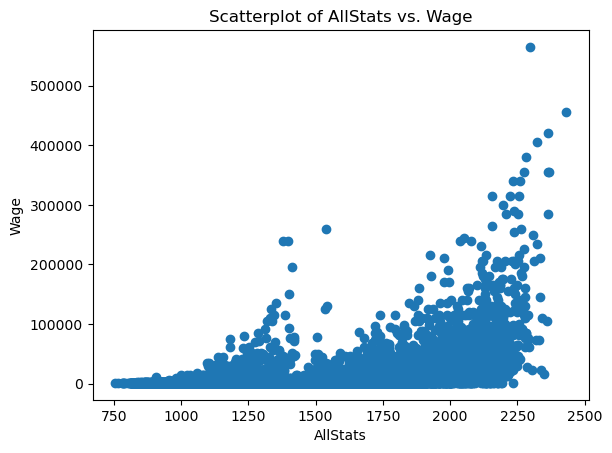

In [281]:
plt.scatter(df['AllStats'], df['Wage'])

# Add labels and title
plt.xlabel('AllStats')
plt.ylabel('Wage')
plt.title('Scatterplot of AllStats vs. Wage')

# Show the plot
plt.show()

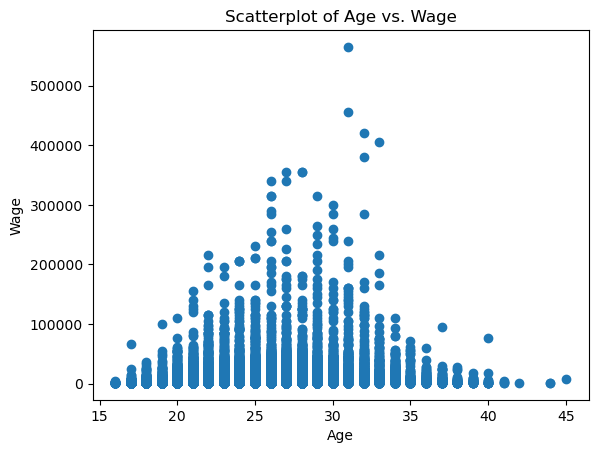

In [282]:
plt.scatter(df['Age'], df['Wage'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Scatterplot of Age vs. Wage')

# Show the plot
plt.show()

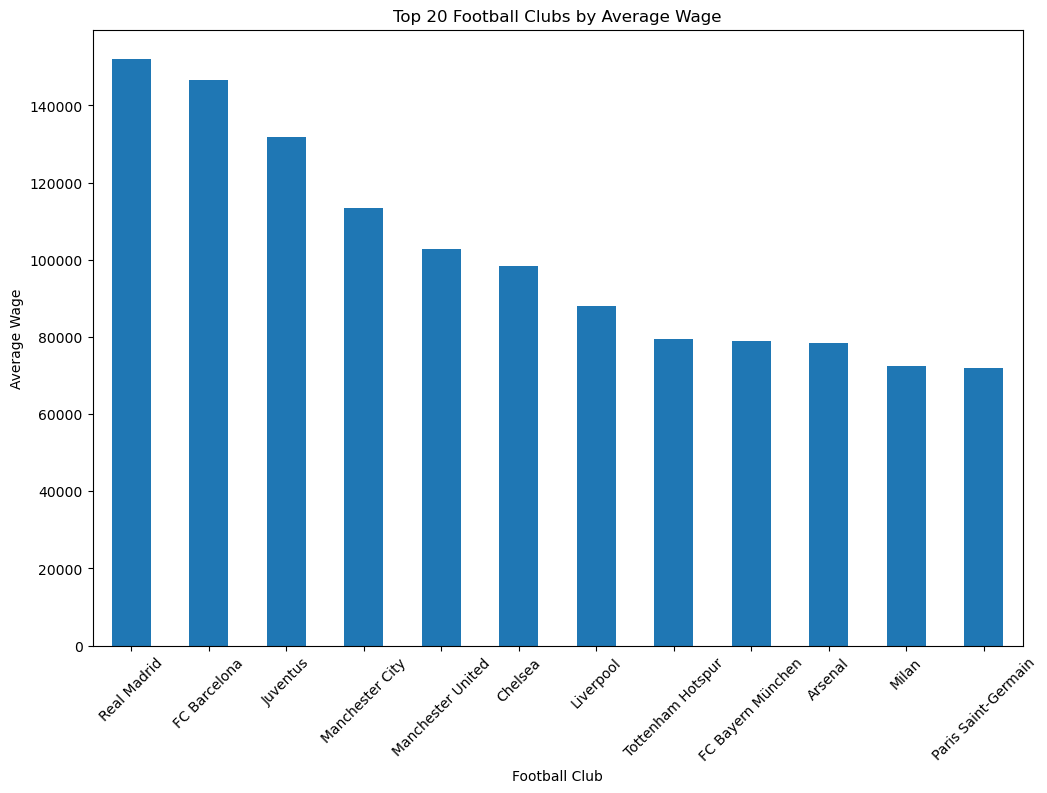

In [283]:
avg_wage_by_club = df.groupby('Club')['Wage'].mean().sort_values(ascending=False).head(12)

# Create the bar chart
plt.figure(figsize=(12, 8))
avg_wage_by_club.plot(kind='bar')

# Add labels and title
plt.xlabel('Football Club')
plt.ylabel('Average Wage')
plt.title('Top 20 Football Clubs by Average Wage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

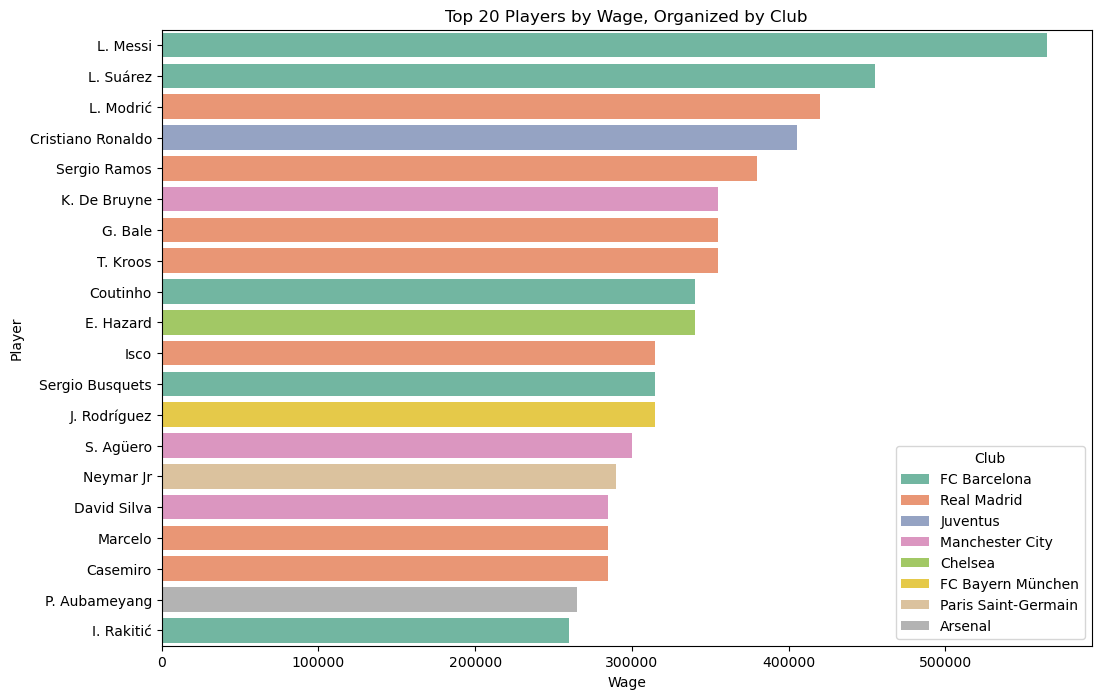

In [284]:
top_20_players = df.sort_values(by='Wage', ascending=False).head(20)

# Create the bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Wage', y='Name', data=top_20_players, hue='Club', dodge=False, palette='Set2')

# Add labels and title
plt.xlabel('Wage')
plt.ylabel('Player')
plt.title('Top 20 Players by Wage, Organized by Club')

# Show the plot
plt.show()

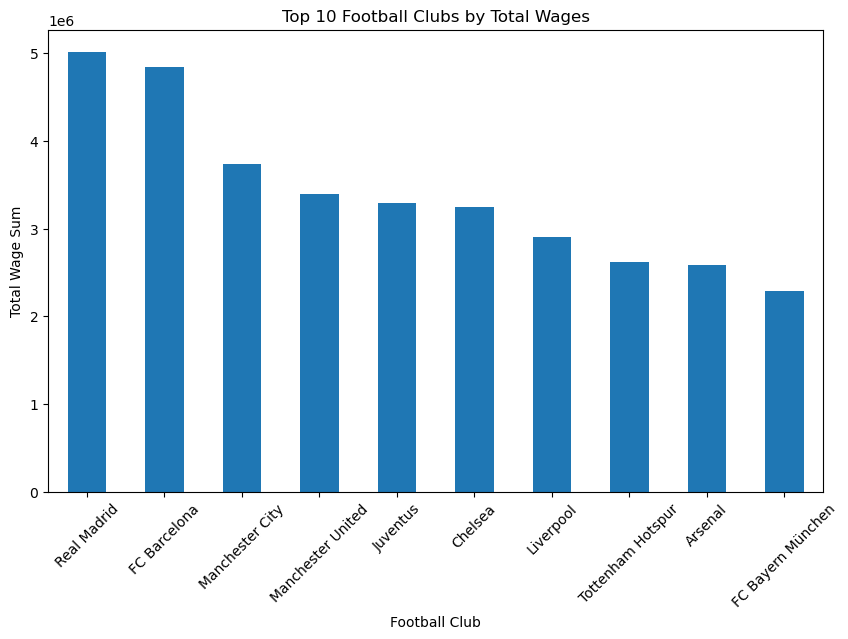

In [285]:
# Group by 'FClub' and sum the wages
wage_sum_by_club = df.groupby('Club')['Wage'].sum().sort_values(ascending=False)

# Select the top 10
top_10_wage_sum = wage_sum_by_club.head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
top_10_wage_sum.plot(kind='bar')

# Add labels and title
plt.xlabel('Football Club')
plt.ylabel('Total Wage Sum')
plt.title('Top 10 Football Clubs by Total Wages')

# Show the plot
plt.xticks(rotation=45)  
plt.show()

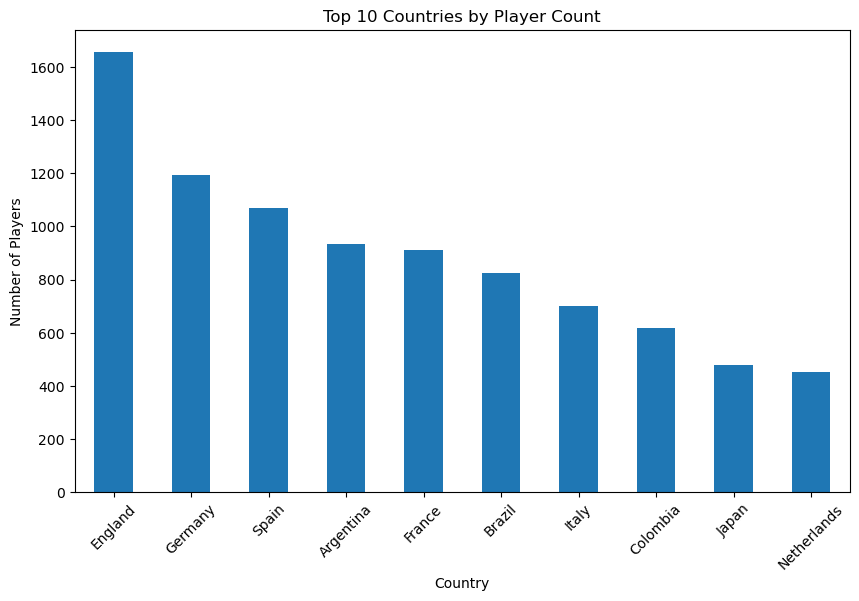

In [286]:
# Group by 'Country' and count the number of players in each country
country_player_count = df['Nationality'].value_counts().head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
country_player_count.plot(kind='bar')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.title('Top 10 Countries by Player Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()